In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
#download drone dataset
dataset = 'https://www.kaggle.com/datasets/dasmehdixtr/drone-dataset-uav'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: biezdietnyidaniil
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dasmehdixtr/drone-dataset-uav


100%|██████████| 716M/716M [00:09<00:00, 77.5MB/s]


In [ ]:
#download random photos without drones
dataset = 'https://www.kaggle.com/datasets/pankajkumar2002/random-image-sample-dataset'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: biezdietnyidaniil
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pankajkumar2002/random-image-sample-dataset


100%|██████████| 42.5M/42.5M [00:00<00:00, 57.8MB/s]


In [ ]:
import os

#adding unique handpicked images
#path for image folder
image_folder = '/content/custom_photos'

#path for labels folder
text_folder = '/content/added_labels'

#creating path for labels folder if not exist yet
os.makedirs(text_folder, exist_ok=True)

#loop over all images
for filename in os.listdir(image_folder):
    #all image names should be in the appropriate format 'no-drone_{index}'
    if filename.startswith('no-drone_') and filename.endswith('.jpg'):  #
        #get index
        identifier = filename.split('_')[1].split('.')[0]
        #set name of txt file
        text_filename = f'no-drone_{identifier}.txt'
        #label file path
        text_filepath = os.path.join(text_folder, text_filename)

        #creating empty text file
        with open(text_filepath, 'w') as file:
            file.write('')

        print(f'Created {text_filepath}')

Created /content/added_labels/no-drone_98.txt
Created /content/added_labels/no-drone_76.txt
Created /content/added_labels/no-drone_4.txt
Created /content/added_labels/no-drone_100.txt
Created /content/added_labels/no-drone_38.txt
Created /content/added_labels/no-drone_81.txt
Created /content/added_labels/no-drone_14.txt
Created /content/added_labels/no-drone_61.txt
Created /content/added_labels/no-drone_37.txt
Created /content/added_labels/no-drone_109.txt
Created /content/added_labels/no-drone_43.txt
Created /content/added_labels/no-drone_107.txt
Created /content/added_labels/no-drone_99.txt
Created /content/added_labels/no-drone_90.txt
Created /content/added_labels/no-drone_32.txt
Created /content/added_labels/no-drone_77.txt
Created /content/added_labels/no-drone_62.txt
Created /content/added_labels/no-drone_95.txt
Created /content/added_labels/no-drone_50.txt
Created /content/added_labels/no-drone_89.txt
Created /content/added_labels/no-drone_23.txt
Created /content/added_labels/no

In [ ]:
#folder with downloaded dataset without drone images
image_folder = '/content/random-image-sample-dataset/data'

#image folder
text_folder = '/content/added_labels'

# Создаем папку для текстовых файлов, если она не существует
os.makedirs(text_folder, exist_ok=True)

for filename in os.listdir(image_folder):
    # Проверяем, что имя файла соответствует шаблону и находится в заданном диапазоне
    if filename.endswith('.jpg') and filename[:-4].isdigit():
        identifier = int(filename[:-4])
        if 20000 <= identifier <= 25000:
            # Формируем имя текстового файла
            text_filename = f'{identifier}.txt'
            # Путь к текстовому файлу
            text_filepath = os.path.join(text_folder, text_filename)

            # Создаем текстовый файл
            with open(text_filepath, 'w') as file:
                file.write('')

            print(f'Created {text_filepath}')

Created /content/added_labels/21464.txt
Created /content/added_labels/21669.txt
Created /content/added_labels/22219.txt
Created /content/added_labels/22029.txt
Created /content/added_labels/23048.txt
Created /content/added_labels/21516.txt
Created /content/added_labels/20147.txt
Created /content/added_labels/23163.txt
Created /content/added_labels/20785.txt
Created /content/added_labels/21607.txt
Created /content/added_labels/21973.txt
Created /content/added_labels/24130.txt
Created /content/added_labels/21605.txt
Created /content/added_labels/22860.txt
Created /content/added_labels/21170.txt
Created /content/added_labels/24208.txt
Created /content/added_labels/22175.txt
Created /content/added_labels/22818.txt
Created /content/added_labels/20671.txt
Created /content/added_labels/22956.txt
Created /content/added_labels/22326.txt
Created /content/added_labels/21715.txt
Created /content/added_labels/21455.txt
Created /content/added_labels/21761.txt
Created /content/added_labels/22890.txt


In [ ]:
#if error with locale occured
import locale
locale.getpreferredencoding = lambda: "UTF-8"
#copy files to diretrory of drone dataset
!cp -a /content/added_labels/. /content/drone-dataset-uav/drone_dataset_yolo/dataset_txt
!cp -a /content/custom_photos/. /content/drone-dataset-uav/drone_dataset_yolo/dataset_txt
!cp -a /content/random-image-sample-dataset/data/. /content/drone-dataset-uav/drone_dataset_yolo/dataset_txt

***Preprocess dataset to apropriate YOLO format***

In [ ]:
from pathlib import Path

DATA_DIR = Path("/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt")
print(len(os.listdir(DATA_DIR)))

8937


In [ ]:
images = sorted(list(DATA_DIR.glob("*.jpg")))
print("Total images: ", len(images))
images[:5]

Total images:  4468


[PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0001.jpg'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0003.jpg'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0004.jpg'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0005.jpg'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0006.jpg')]

In [ ]:
labels = sorted(list(DATA_DIR.glob("*.txt")))
print("Total labels: ", len(labels))
labels[:5]

Total labels:  4469


[PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0001.txt'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0003.txt'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0004.txt'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0005.txt'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0006.txt')]

There is difference b/w count of labels and images, finding the redundant label
***italicized text***

In [ ]:
set([label_path.stem for label_path in labels]) - set([image_path.stem for image_path in images])

{'classes'}

#### There is a redundant file **"classes.txt"**

In [ ]:
# Reading classes.txt
with open(DATA_DIR/"classes.txt", 'r') as f:
    print(f.read())

drone



In [ ]:
#Removing classes.txt from labels list
FILE_TO_REMOVE = DATA_DIR / "classes.txt"
labels.remove(FILE_TO_REMOVE)

In [ ]:
print("Images: ", len(images), " Labels: ", len(labels))

Images:  4468  Labels:  4468


## Generating dataset in YOLO format

```
Data
|-- data.yaml
|-- train
|   |-- images
|   `-- labels
|-- test
|   |-- images
|   `-- labels
`-- val
    |-- images
    `-- labels
```

### Creating directories and copying files

In [ ]:
DATA_DIR = Path("Data")
TRAIN_DIR = DATA_DIR / "train"
TEST_DIR = DATA_DIR / "test"
VALIDATION_DIR = DATA_DIR / "val"
os.makedirs(TRAIN_DIR/ "images")
os.makedirs(TRAIN_DIR/ "labels")
os.makedirs(TEST_DIR/ "images")
os.makedirs(TEST_DIR/ "labels")
os.makedirs(VALIDATION_DIR/ "images")
os.makedirs(VALIDATION_DIR/ "labels")

In [ ]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split

X_train,X_temp,y_train,y_temp = train_test_split(images, labels, test_size = 0.2)
X_val,X_test,y_val,y_test = train_test_split(X_temp, y_temp, test_size = 0.2)

In [ ]:
print("Train image count: ", len(X_train))
print("Validation image count: ", len(X_val))
print("Test image count: ", len(X_test))

Train image count:  3574
Validation image count:  715
Test image count:  179


In [ ]:
X_train[:5], y_train[:5]

([PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_704.jpg'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/22994.jpg'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_371.jpg'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0330.jpg'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0256.jpg')],
 [PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_704.txt'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/22994.txt'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_371.txt'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0330.txt'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0256.txt')])

In [ ]:
import shutil
from tqdm.notebook import tqdm

def copyfiles(files, dest):
    print(f"Copying files to {dest}")
    for file in tqdm(files):
        shutil.copy(file, dest)

copyfiles(X_train, TRAIN_DIR/ "images")
copyfiles(y_train, TRAIN_DIR/ "labels")

copyfiles(X_test, TEST_DIR/ "images")
copyfiles(y_test, TEST_DIR/ "labels")

copyfiles(X_val, VALIDATION_DIR/ "images")
copyfiles(y_val, VALIDATION_DIR/ "labels")

Copying files to Data/train/images


  0%|          | 0/3574 [00:00<?, ?it/s]

Copying files to Data/train/labels


  0%|          | 0/3574 [00:00<?, ?it/s]

Copying files to Data/test/images


  0%|          | 0/179 [00:00<?, ?it/s]

Copying files to Data/test/labels


  0%|          | 0/179 [00:00<?, ?it/s]

Copying files to Data/val/images


  0%|          | 0/715 [00:00<?, ?it/s]

Copying files to Data/val/labels


  0%|          | 0/715 [00:00<?, ?it/s]

## Creating configuration file `data.yaml`

In [ ]:
data_yaml = """
train: /content/Data/train/images
test: /content/Data/test/images
val: /content/Data/val/images

names:
  0: drone
"""

with open(DATA_DIR/"data.yaml", "w") as f:
    f.write(data_yaml)

In [ ]:
os.listdir(DATA_DIR)

['val', 'test', 'train', 'data.yaml']

In [ ]:
with open(DATA_DIR/"data.yaml", "r") as f:
    print(f.read())


train: /content/Data/train/images
test: /content/Data/test/images
val: /content/Data/val/images

names:
  0: drone



## Installing ultralytics and training the Yolov9c model

Removing `wandb` to avoid the unnecessary API Key request while training the model

In [ ]:
!pip uninstall wandb -y
!pip -q install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.5/825.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 72.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov9c')

In [ ]:
# Training yolov9c model
results = model.train(
    data = DATA_DIR/"data.yaml",
    epochs = 120,
    imgsz = 640,
    single_cls = True,
)

Ultralytics YOLOv8.2.62 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=Data/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 102MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 279MB/s]


AMP: checks passed ✅


train: Scanning /content/Data/train/labels... 3574 images, 2510 backgrounds, 0 corrupt: 100%|██████████| 3574/3574 [00:03<00:00, 1180.29it/s]

train: WARNING ⚠️ /content/Data/train/images/pic_722.jpg: corrupt JPEG restored and saved
train: New cache created: /content/Data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Data/val/labels... 714 images, 485 backgrounds, 1 corrupt: 100%|██████████| 715/715 [00:00<00:00, 1026.59it/s]

val: WARNING ⚠️ /content/Data/val/images/no-drone_28.jpg: ignoring corrupt image/label: cannot identify image file '/content/Data/val/images/no-drone_28.jpg'
val: New cache created: /content/Data/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      11.3G      1.926      3.057       2.05         10        640: 100%|██████████| 224/224 [00:52<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.02it/s]

                   all        714        264   0.000343     0.0455   0.000215   6.66e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      11.1G      2.153      2.601      2.203          5        640: 100%|██████████| 224/224 [00:47<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.25it/s]

                   all        714        264      0.187      0.227       0.12      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      11.2G      2.024      2.376      2.076          3        640: 100%|██████████| 224/224 [00:46<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.28it/s]

                   all        714        264      0.106      0.122     0.0392    0.00864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      11.2G      1.914      2.178       1.98          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.49it/s]

                   all        714        264      0.472      0.432      0.383      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      11.2G       1.87       2.09      1.938         10        640: 100%|██████████| 224/224 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.64it/s]

                   all        714        264      0.391      0.318      0.284      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      11.2G      1.797      2.004      1.887          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.87it/s]

                   all        714        264      0.498      0.439       0.44      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      11.2G      1.761      1.964      1.856          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.43it/s]

                   all        714        264      0.648      0.481      0.526      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      11.1G      1.718      1.842      1.811          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.48it/s]

                   all        714        264      0.567      0.472      0.473      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      11.2G      1.674      1.727      1.775          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.37it/s]

                   all        714        264    0.00568       0.36    0.00355    0.00123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      11.2G      1.652      1.694      1.746          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.64it/s]

                   all        714        264      0.793      0.537      0.644       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      11.1G      1.675      1.719      1.755          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.49it/s]

                   all        714        264      0.707      0.621      0.672      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      11.2G      1.662      1.641      1.744          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.77it/s]

                   all        714        264      0.749      0.602      0.689      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      11.2G      1.601      1.585      1.703          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.42it/s]

                   all        714        264      0.705       0.61      0.671      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      11.2G      1.598      1.533      1.682          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.55it/s]

                   all        714        264      0.703      0.606      0.629       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      11.2G       1.58      1.504      1.658         12        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.55it/s]

                   all        714        264      0.651       0.53      0.585      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      11.1G      1.548      1.508      1.665          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.15it/s]


                   all        714        264       0.77      0.636      0.714      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      11.2G      1.546      1.464      1.641          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.00it/s]

                   all        714        264      0.785      0.614      0.714      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      11.2G       1.53      1.445       1.63          1        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.05it/s]


                   all        714        264      0.794      0.612      0.698      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      11.2G      1.524      1.452      1.625          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.51it/s]

                   all        714        264      0.701      0.682      0.718       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      11.2G      1.485      1.379      1.594          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.19it/s]

                   all        714        264      0.717      0.651      0.711      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      11.2G      1.483      1.349      1.602          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.06it/s]

                   all        714        264      0.821      0.711      0.773      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      11.2G       1.45      1.302      1.587          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.07it/s]

                   all        714        264      0.758      0.682       0.77      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      11.2G      1.463      1.299      1.597          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.01it/s]

                   all        714        264      0.799      0.721       0.79      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      11.2G      1.474      1.285      1.582          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.66it/s]

                   all        714        264      0.762      0.708      0.781       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      11.2G      1.482      1.302      1.596          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.32it/s]

                   all        714        264      0.848      0.701      0.777      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      11.2G      1.462      1.263      1.584          7        640: 100%|██████████| 224/224 [00:45<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.13it/s]

                   all        714        264      0.893      0.697      0.814      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      11.1G       1.45      1.251      1.549          1        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.29it/s]


                   all        714        264      0.917      0.749      0.824      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      11.1G      1.405      1.238      1.531          7        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.14it/s]

                   all        714        264      0.807      0.697      0.783      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      11.2G      1.434      1.207      1.557          2        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.88it/s]

                   all        714        264      0.853      0.739      0.833      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      11.2G      1.398      1.177      1.514          9        640: 100%|██████████| 224/224 [00:45<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.96it/s]

                   all        714        264      0.846      0.746      0.834      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      11.2G      1.398       1.19      1.524          9        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.81it/s]

                   all        714        264      0.883      0.746      0.845      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      11.2G      1.396       1.17      1.525          9        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.90it/s]


                   all        714        264      0.881      0.731      0.847      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      11.2G      1.397      1.132       1.52          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.15it/s]


                   all        714        264      0.857      0.708      0.822      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      11.1G      1.357      1.113      1.471          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.97it/s]

                   all        714        264      0.917      0.755      0.841        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      11.2G      1.343      1.083      1.488          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.07it/s]

                   all        714        264      0.875      0.742      0.813      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      11.2G      1.354      1.097      1.494          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.98it/s]

                   all        714        264      0.842      0.746       0.84      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      11.2G       1.35      1.076      1.479          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.15it/s]

                   all        714        264      0.857      0.803      0.857       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      11.1G      1.321      1.037      1.459          1        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.18it/s]


                   all        714        264      0.809      0.769      0.844      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      11.1G      1.348      1.102      1.475          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.35it/s]

                   all        714        264      0.892      0.778      0.849      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      11.1G      1.328      1.086       1.47          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.02it/s]

                   all        714        264       0.89       0.78      0.851      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      11.2G      1.312      1.066      1.451         10        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.31it/s]

                   all        714        264      0.888      0.765      0.846      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      11.2G      1.347      1.047      1.472         10        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.74it/s]

                   all        714        264      0.865      0.804       0.86      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      11.1G      1.317       1.02      1.468          2        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.86it/s]

                   all        714        264      0.862       0.78      0.863      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      11.2G      1.307      1.012      1.444          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.30it/s]

                   all        714        264      0.912      0.761      0.869      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      11.2G      1.268     0.9865      1.425          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.22it/s]

                   all        714        264        0.9      0.816      0.888      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      11.2G      1.279     0.9838       1.44          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.94it/s]

                   all        714        264      0.887      0.811      0.881      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      11.2G      1.295     0.9878      1.447          7        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.09it/s]

                   all        714        264      0.898      0.792      0.878      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      11.2G      1.271      1.005      1.436          7        640: 100%|██████████| 224/224 [00:45<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.23it/s]

                   all        714        264      0.891      0.777      0.865      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      11.2G      1.257     0.9653      1.417          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.09it/s]


                   all        714        264      0.905       0.79      0.882      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      11.2G      1.254     0.9426      1.407          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.15it/s]

                   all        714        264      0.923      0.792      0.893      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      11.2G      1.254     0.9639      1.415          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.05it/s]

                   all        714        264       0.94      0.778      0.896      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      11.2G      1.244     0.9217      1.402          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.12it/s]

                   all        714        264      0.887      0.792      0.879      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      11.2G      1.289     0.9575      1.423          2        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.28it/s]


                   all        714        264      0.936      0.827      0.904      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      11.2G      1.228     0.9362      1.387          2        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.81it/s]

                   all        714        264      0.906      0.792      0.895      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      11.2G       1.23     0.9265      1.389          1        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.35it/s]

                   all        714        264      0.929      0.798      0.887      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      11.2G      1.221     0.9083      1.392          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.12it/s]

                   all        714        264      0.862      0.826      0.881      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      11.2G      1.224     0.8826      1.387          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.39it/s]

                   all        714        264      0.906      0.802       0.89      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      11.2G       1.22     0.8903       1.39          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.13it/s]


                   all        714        264      0.928      0.831      0.902      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      11.2G      1.216     0.8873      1.374          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.98it/s]

                   all        714        264      0.905      0.829      0.892      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      11.2G        1.2     0.8661      1.373          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.17it/s]

                   all        714        264      0.937      0.811      0.885      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      11.2G      1.191     0.8546      1.383          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.18it/s]

                   all        714        264      0.932      0.833      0.898      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      11.2G       1.21     0.8842      1.376          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.29it/s]

                   all        714        264      0.924      0.845       0.91      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      11.2G      1.187      0.876      1.366          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.33it/s]

                   all        714        264      0.907      0.826      0.885      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      11.2G      1.189     0.8509      1.368          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.18it/s]

                   all        714        264      0.935      0.814      0.898      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      11.2G      1.182     0.8528      1.368          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.12it/s]

                   all        714        264       0.92       0.86      0.916      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      11.2G      1.179     0.8496       1.36          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.45it/s]

                   all        714        264      0.907      0.848      0.892      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      11.2G      1.171     0.8427      1.354          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.19it/s]


                   all        714        264      0.922      0.867      0.915      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      11.2G      1.169     0.8292      1.364          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.18it/s]

                   all        714        264      0.965      0.841      0.923      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      11.2G      1.159     0.8254      1.348          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.30it/s]

                   all        714        264      0.942      0.864      0.915       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      11.2G      1.165     0.7949      1.347          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.33it/s]

                   all        714        264      0.917       0.86      0.911      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      11.2G      1.144       0.82      1.328          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.50it/s]

                   all        714        264      0.947      0.833      0.908      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      11.2G       1.14     0.7823       1.33          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.28it/s]

                   all        714        264      0.932      0.837      0.915      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      11.2G      1.142     0.8142      1.335          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.32it/s]

                   all        714        264      0.932      0.828      0.903      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      11.2G      1.127      0.804       1.33          9        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.49it/s]

                   all        714        264      0.902      0.872      0.908      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      11.1G      1.121     0.7807       1.33          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.29it/s]

                   all        714        264      0.959      0.856      0.907      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      11.2G      1.124     0.7915      1.323          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.17it/s]

                   all        714        264      0.937      0.814      0.899      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      11.1G      1.133     0.7702      1.324          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.31it/s]

                   all        714        264      0.946      0.841      0.903      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      11.2G      1.115     0.7642      1.317          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.31it/s]

                   all        714        264      0.958      0.833      0.906      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      11.2G      1.096     0.7384        1.3          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.38it/s]

                   all        714        264      0.947      0.864      0.922      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      11.2G      1.127     0.7714      1.317          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.29it/s]

                   all        714        264       0.95      0.866       0.92      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      11.2G       1.12     0.7826      1.324          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.50it/s]

                   all        714        264      0.945      0.841      0.913      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      11.2G      1.085     0.7362      1.296          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.43it/s]

                   all        714        264      0.958      0.879      0.924       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      11.2G      1.089     0.7544      1.315          9        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.22it/s]

                   all        714        264      0.966      0.852      0.929      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      11.2G       1.08     0.7214      1.296          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.17it/s]


                   all        714        264      0.921       0.89      0.927      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      11.1G      1.075     0.7247      1.301          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.33it/s]

                   all        714        264      0.941      0.883      0.918      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      11.2G      1.084     0.7465      1.305          2        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.29it/s]

                   all        714        264      0.963      0.877      0.921      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      11.2G      1.053     0.7291      1.291          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.41it/s]

                   all        714        264      0.947      0.874      0.917      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      11.2G      1.052     0.7018      1.279          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.44it/s]

                   all        714        264      0.938       0.86      0.919      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      11.2G      1.071     0.7154      1.294          7        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.43it/s]

                   all        714        264      0.941      0.902      0.925       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      11.2G      1.054     0.7094       1.28          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.46it/s]

                   all        714        264      0.939      0.874      0.922      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      11.2G      1.056     0.6973      1.275          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.33it/s]

                   all        714        264       0.95      0.864      0.911      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      11.2G      1.041     0.7058      1.275          2        640: 100%|██████████| 224/224 [00:45<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.30it/s]

                   all        714        264      0.953      0.851      0.915      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      11.2G      1.054      0.704      1.286          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.29it/s]

                   all        714        264      0.966      0.875      0.919       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      11.2G      1.043     0.7051      1.265          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.40it/s]

                   all        714        264      0.958      0.862      0.913       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      11.2G      1.025     0.6817      1.256          6        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.40it/s]


                   all        714        264      0.947      0.871       0.91      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      11.2G      1.023     0.6774      1.261          9        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.50it/s]

                   all        714        264      0.939      0.877       0.92      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      11.2G      1.026     0.6805      1.267          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.48it/s]

                   all        714        264      0.942      0.871      0.918      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      11.2G      1.007     0.6759      1.249          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.47it/s]

                   all        714        264       0.95      0.879      0.926      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      11.2G      1.028      0.671      1.266          2        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.44it/s]

                   all        714        264      0.959      0.892       0.93      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      11.1G     0.9924     0.6523      1.255          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.33it/s]

                   all        714        264      0.966      0.853      0.919       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      11.2G     0.9929     0.6482      1.243          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.35it/s]

                   all        714        264      0.939      0.874      0.915      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      11.1G     0.9885      0.652       1.25          7        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.36it/s]

                   all        714        264      0.939      0.871      0.911      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      11.2G     0.9792     0.6506      1.245          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.49it/s]

                   all        714        264      0.969      0.875      0.923      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      11.2G     0.9793      0.653       1.24          5        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.48it/s]


                   all        714        264      0.955      0.883       0.92      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      11.2G     0.9928     0.6458      1.248          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.52it/s]

                   all        714        264      0.951      0.871      0.917      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      11.2G     0.9995     0.6639      1.248          7        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.47it/s]

                   all        714        264      0.958      0.859      0.915      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      11.2G     0.9559     0.6315      1.227          2        640: 100%|██████████| 224/224 [00:45<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.47it/s]

                   all        714        264      0.944      0.888      0.925      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      11.2G     0.9555     0.6205      1.212          9        640: 100%|██████████| 224/224 [00:45<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.42it/s]

                   all        714        264       0.96      0.875      0.922      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      11.2G     0.9402     0.6151      1.233          1        640: 100%|██████████| 224/224 [00:45<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.22it/s]

                   all        714        264      0.947      0.871      0.913       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      11.2G     0.9735     0.6271      1.224          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.21it/s]

                   all        714        264      0.946      0.875      0.913      0.617


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      11.2G     0.8506     0.4956      1.215          3        640: 100%|██████████| 224/224 [00:45<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.37it/s]

                   all        714        264      0.966       0.87      0.916      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      11.1G      0.822      0.476      1.199          2        640: 100%|██████████| 224/224 [00:44<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.43it/s]

                   all        714        264      0.958      0.863      0.919      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      11.2G      0.799       0.45      1.191          2        640: 100%|██████████| 224/224 [00:45<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.36it/s]

                   all        714        264      0.932       0.88       0.92      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      11.2G     0.8087     0.4606      1.196          8        640: 100%|██████████| 224/224 [00:45<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.42it/s]


                   all        714        264      0.954      0.867      0.917      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      11.2G     0.7844     0.4593      1.166          2        640: 100%|██████████| 224/224 [00:44<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.33it/s]

                   all        714        264      0.932      0.875      0.917       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      11.1G     0.7837     0.4319      1.167          0        640: 100%|██████████| 224/224 [00:45<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.28it/s]

                   all        714        264      0.943      0.879      0.925       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      11.2G      0.797     0.4577      1.189          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.36it/s]

                   all        714        264      0.943      0.878      0.917      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      11.2G     0.7899      0.452      1.184          4        640: 100%|██████████| 224/224 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.49it/s]

                   all        714        264      0.952      0.867      0.914      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      11.2G     0.7735     0.4366      1.179          1        640: 100%|██████████| 224/224 [00:45<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.50it/s]

                   all        714        264      0.962      0.857      0.915      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      11.1G     0.7641     0.4238      1.168          0        640: 100%|██████████| 224/224 [00:45<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  7.49it/s]

                   all        714        264      0.942       0.86      0.913      0.617



120 epochs completed in 1.672 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.62 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv9c summary (fused): 384 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.43it/s]


                   all        714        264      0.951      0.867      0.914      0.625
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model.info()

YOLOv9c summary: 618 layers, 25,530,003 parameters, 0 gradients, 103.7 GFLOPs


(618, 25530003, 0, 103.68291839999999)

In [ ]:
#checking model repformance results
results = model(source = '/content/image_2024-06-28_213613731.png', save = True, conf = 0.3)


image 1/1 /content/image_2024-06-28_213613731.png: 448x640 2 drones, 1519.6ms
Speed: 4.8ms preprocess, 1519.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


In [ ]:
for result in results:
    boxes = result.boxes.xyxy  # Bounding box coordinates
    confs = result.boxes.conf  # Confidence scores
    classes = result.boxes.cls  # Class IDs

    for box, conf, cls in zip(boxes, confs, classes):
        label = result.names[int(cls)]  # Get the label of the class
        print(f"Label: {label}, Box: {box.tolist()}, Confidence: {conf.item()}")

Label: drone, Box: [181.84933471679688, 71.11268615722656, 528.1698608398438, 219.39288330078125], Confidence: 0.6122801303863525
Label: drone, Box: [145.251708984375, 412.2695007324219, 391.7632141113281, 521.8328857421875], Confidence: 0.4458802044391632


Plotting validation metrics

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
source = model('/content/drone_1.png', save = True, conf = 0.45)


image 1/1 /content/drone_1.png: 192x640 1 drone, 27.1ms
Speed: 2.3ms preprocess, 27.1ms inference, 2.2ms postprocess per image at shape (1, 3, 192, 640)
Results saved to runs/detect/predict


In [ ]:
print(source[0].boxes.xyxy)

tensor([[ 949.2393,   85.0623, 1006.0463,  120.4337]], device='cuda:0')


In [ ]:
vectors = [source[0].boxes.xyxy[i] for i in range(source[0].boxes.xyxy.shape[0])]
print(vectors)

[tensor([ 949.2393,   85.0623, 1006.0463,  120.4337], device='cuda:0')]


In [ ]:
# Assuming tensor_data is your tensor
tensor_data = source[0].boxes.xyxy

# Print the tensor
print("Tensor Data:\n", tensor_data)

# Extracting individual vectors
first_vector = tensor_data[0]
print("\nFirst Vector:\n", first_vector)

# Iterating over all vectors
vectors = [tensor_data[i] for i in range(tensor_data.shape[0])]
for i, vector in enumerate(vectors):
    print(f"\nVector {i+1}:\n", vector)

# Converting to NumPy
numpy_vectors = tensor_data.cpu().numpy()  # Move to CPU if necessary
for i, vector in enumerate(numpy_vectors):
    print(f"\nNumPy Vector {i+1}:\n", vector)

Tensor Data:
 tensor([[ 949.2393,   85.0623, 1006.0463,  120.4337]], device='cuda:0')

First Vector:
 tensor([ 949.2393,   85.0623, 1006.0463,  120.4337], device='cuda:0')

Vector 1:
 tensor([ 949.2393,   85.0623, 1006.0463,  120.4337], device='cuda:0')

NumPy Vector 1:
 [     949.24      85.062        1006      120.43]


In [ ]:
print(numpy_vectors)

[[     949.24      85.062        1006      120.43]]


In [ ]:
image_path

'/content/drone.png'

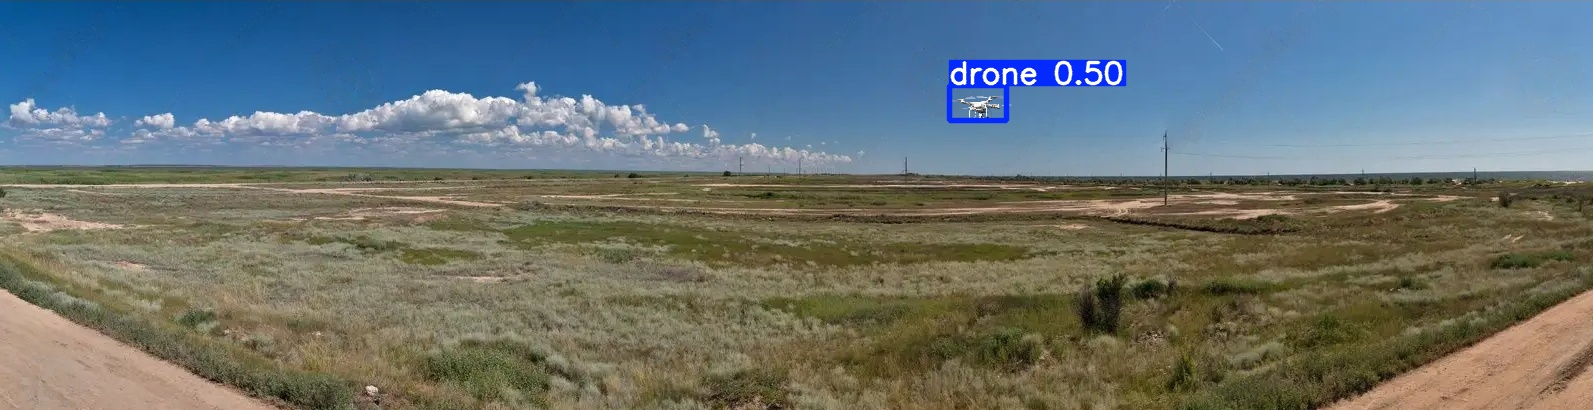

In [ ]:
source[0].save("detected.jpg")
Image.open("detected.jpg")

In [ ]:
#using MiDaS to build depth map

In [ ]:
import cv2
import torch
import urllib.request

In [ ]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to /root/.cache/torch/hub/checkpoints/dpt_large_384.pt
100%|██████████| 1.28G/1.28G [00:10<00:00, 129MB/s]


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [ ]:
model_type = "DPT_Large"
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
img = cv2.imread('/content/drone_1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
input_batch = transform(img).to(device)

In [ ]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

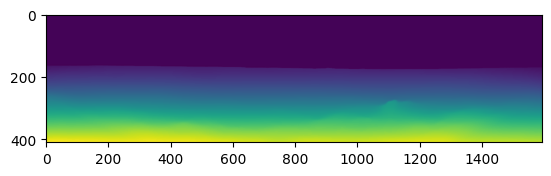

In [ ]:
plt.imshow(output)

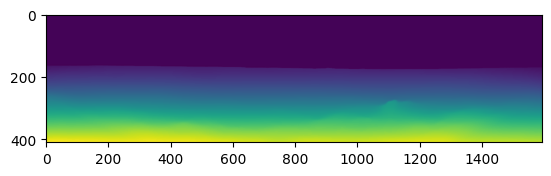

In [ ]:
image = output
for vector in numpy_vectors:
  x1, y1, x2, y2 = map(int, vector)  # Convert to integer
  cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box with thickness 2
  # Display the image with bounding boxes
plt.imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()